In [23]:
import re

import pandas as pd
import matplotlib.pyplot as plt

In [38]:
NAME = "clear"

In [39]:
short_df = pd.read_csv(f"short_{NAME}.csv")
exploded_df = pd.read_csv(f"exploded_{NAME}.csv")

In [19]:
short_df.head()

,company_id,name,address,website,ypage,rating_of_organization,count_of_reviews,reviews,real_count_of_reviews
0,191280394455,Лукойл,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,"[{'author': 'Аveldef05', 'rating': '5.0', 'dat...",257
1,21998920950,Роснефть,"Театральная площадь, 7, Санкт-Петербург",komandacard.ru,https://yandex.ru/maps/org/rosneft/21998920950/,"4,2",398,"[{'author': 'Тимофей Волохов', 'rating': '5.0'...",399
2,222337486264,Газпромнефть,"ул. Циолковского, 18Я, Санкт-Петербург",gpnbonus.ru,https://yandex.ru/maps/org/gazpromneft/2223374...,"4,4",526,"[{'author': 'алена п', 'rating': '5.0', 'date'...",527
3,152548775809,Лукойл,"просп. Добролюбова, 20, корп. 6, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/152548775809/,"4,4",249,"[{'author': 'ирина иванова', 'rating': '5.0', ...",250
4,196117711299,Газпромнефть,"Земледельческая ул., 5АБ, Санкт-Петербург",www.gpnbonus.ru,https://yandex.ru/maps/org/gazpromneft/1961177...,"4,6",269,"[{'author': 'Константин П', 'rating': '4.0', '...",269


In [34]:
short_df["real_count_of_reviews"].median()

np.float64(146.0)

In [40]:
def safe_convert_to_float(series):
    """Безопасная конвертация в float с учетом запятой"""
    if series.dtype == 'object':
        return series.str.replace(',', '.').astype(float)
    else:
        return series.astype(float)

# Применение
short_df['rating_of_organization'] = safe_convert_to_float(short_df['rating_of_organization'])
short_df['count_of_reviews'] = pd.to_numeric(short_df['count_of_reviews'], errors='coerce')

exploded_df['rating'] = safe_convert_to_float(exploded_df['rating'])
exploded_df['rating_of_organization'] = safe_convert_to_float(exploded_df['rating_of_organization'])
exploded_df['date'] = pd.to_datetime(exploded_df['date'], errors='coerce')

In [57]:
a = short_df["count_of_reviews"].to_list()
a.sort()
print(a)

[9, 12, 15, 18, 18, 22, 24, 24, 24, 25, 26, 26, 27, 28, 29, 30, 30, 32, 32, 32, 32, 33, 33, 34, 34, 38, 40, 40, 41, 41, 42, 42, 43, 44, 44, 45, 45, 47, 48, 48, 49, 49, 51, 51, 52, 53, 54, 55, 57, 60, 61, 62, 63, 64, 65, 65, 66, 66, 67, 69, 69, 71, 72, 73, 75, 76, 79, 81, 83, 85, 88, 90, 95, 96, 105, 106, 113, 114, 116, 119, 128, 132, 134, 135, 135, 137, 142, 144, 145, 146, 148, 149, 155, 155, 162, 170, 176, 176, 177, 182, 182, 186, 190, 190, 190, 191, 196, 199, 208, 210, 214, 220, 222, 223, 223, 229, 231, 231, 233, 233, 233, 235, 237, 244, 246, 249, 250, 251, 254, 256, 258, 261, 263, 264, 264, 279, 281, 281, 286, 293, 298, 300, 312, 313, 323, 327, 341, 345, 350, 360, 386, 386, 401, 402, 413, 443, 458, 466, 466, 515, 535, 560, 576, 580, 589, 687, 697, 827, 842, 870, 922, 928, 960, 975, 1031, 1107, 1132, 1202, 1945]


In [ ]:

top_rated = short_df.sort_values(['rating_of_organization', 'count_of_reviews'], 
                                  ascending=[False, False]).head(10)[['name', 'address', 'rating_of_organization', 'count_of_reviews']]


lowest_rated = short_df.sort_values(['rating_of_organization', 'count_of_reviews'], 
                                     ascending=[True, False]).head(10)[['name', 'address', 'rating_of_organization', 'count_of_reviews']]


most_reviewed = short_df.sort_values(['count_of_reviews', 'rating_of_organization'], 
                                     ascending=[False, False]).head(10)[['name', 'address', 'count_of_reviews', 'rating_of_organization']]

In [89]:
lowest_rated[["name", "address", 'rating_of_organization', "count_of_reviews"]]

,name,address,rating_of_organization,count_of_reviews
166,Роснефть,"ул. Кондратенко, 6, Санкт-Петербург",3.9,95
169,Роснефть,"бул. Красных Зорь, 15А, Санкт-Петербург",4.0,148
78,Роснефть,"просп. Непокорённых, 15, Санкт-Петербург",4.1,172
65,Роснефть,"Лиственная ул., 6А, Санкт-Петербург",4.1,155
168,Татнефть,"Народная ул., 100, Санкт-Петербург",4.1,142
180,Роснефть,"ул. Салова, 55, Санкт-Петербург",4.1,112
167,Роснефть,"просп. Стачек, 108А, Санкт-Петербург",4.1,105
13,Роснефть,"Миргородская ул., 1А, Санкт-Петербург",4.2,410
1,Роснефть,"Театральная площадь, 7, Санкт-Петербург",4.2,398
5,Роснефть,"Александровский парк, Санкт-Петербург, 8",4.2,294


C:\Users\GVChempion\AppData\Local\Temp\ipykernel_37500\181143484.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  short_df.groupby('review_bins')['rating_of_organization'].mean()


review_bins
(0.0, 10.0]            NaN
(10.0, 50.0]      4.700000
(50.0, 100.0]     4.483333
(100.0, 500.0]    4.428205
(500.0, inf]      4.623810
Name: rating_of_organization, dtype: float64

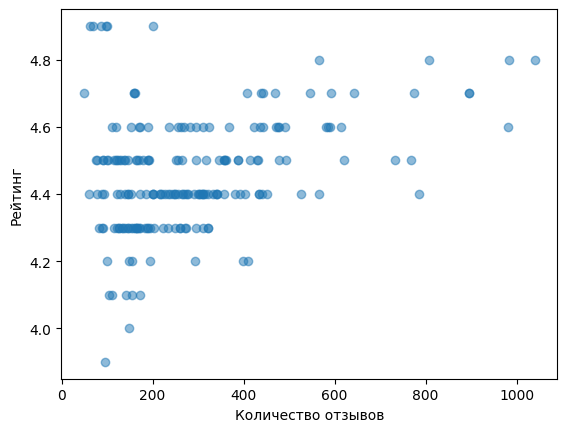

In [ ]:

correlation = short_df[['rating_of_organization', 'count_of_reviews']].corr()


spearman_corr = short_df[['rating_of_organization', 'count_of_reviews']].corr(method='spearman')


plt.scatter(short_df['count_of_reviews'], short_df['rating_of_organization'], alpha=0.5)
plt.xlabel('Количество отзывов')
plt.ylabel('Рейтинг')

short_df['review_bins'] = pd.cut(short_df['count_of_reviews'], bins=[0, 10, 50, 100, 500, float('inf')])
short_df.groupby('review_bins')['rating_of_organization'].mean()

In [41]:

exploded_df['date'] = pd.to_datetime(exploded_df['date'])
exploded_df['year'] = exploded_df['date'].dt.year
exploded_df['month'] = exploded_df['date'].dt.month
exploded_df['season'] = exploded_df['date'].dt.quarter


monthly_activity = exploded_df.groupby(['year', 'month', 'company_id', 'name', 'address']).size().reset_index(name='reviews_count')
top_by_month = monthly_activity.groupby(['year', 'month']).apply(lambda x: x.nlargest(5, 'reviews_count')).reset_index(drop=True)


monthly_ratings = exploded_df.groupby(['year', 'month', 'company_id', 'name', 'address'])['rating'].mean().reset_index()
top_rated_by_month = monthly_ratings.groupby(['year', 'month']).apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)


seasonal = exploded_df.groupby(['season', 'company_id', 'name', 'address']).agg({
    'rating': 'mean',
    'text': 'count'
}).reset_index()
seasonal.columns = ['season', 'company_id', 'name', 'address', 'avg_rating', 'review_count']


company_trends = exploded_df.groupby(['company_id', 'name', 'address', 'year', 'month']).size().reset_index(name='monthly_reviews')

C:\Users\GVChempion\AppData\Local\Temp\ipykernel_37500\2726464427.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_month = monthly_activity.groupby(['year', 'month']).apply(lambda x: x.nlargest(5, 'reviews_count')).reset_index(drop=True)
C:\Users\GVChempion\AppData\Local\Temp\ipykernel_37500\2726464427.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_by_month = monthly_ratings.groupby(['year',

In [ ]:
temp = seasonal.sort_values(['address', "season"])
temp.head(12)

,company_id,name,city,address,website,ypage,rating_of_organization,count_of_reviews,author,rating,date,text
0,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,4.6,257,Аveldef05,5.0,2025-03-19 04:15:20.691000+00:00,"Заправка Лукойл понравилась: чисто, аккуратно ..."
1,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,4.6,257,Константин Писклов,5.0,2024-11-26 18:54:41.179000+00:00,"Рядом с домом, поэтому очень часто заправляюсь..."
2,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,4.6,257,Александра Котик,5.0,2025-04-15 12:22:09.131000+00:00,"Лучшие операторы! Вкусные френч доги, заправщи..."
3,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,4.6,257,Андрей Б.,4.0,2025-04-20 17:50:35.393000+00:00,"Топливо всегда норм, но заезд и выезд по 2 с к..."
4,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,4.6,257,Александра Крылова,1.0,2025-09-09 13:54:19.482000+00:00,"Замок в туалете не работает, сотрудники совсем..."


In [ ]:
import numpy as np


years = [2023, 2024, 2025]

print("=== ТОП-10 ОРГАНИЗАЦИИ ПО ГОДАМ (взвешенная оценка) ===")
for year in years:
    year_data = exploded_df[exploded_df['year'] == year]
    
    if not year_data.empty:
        top_year = year_data.groupby(['name', 'address']).agg({
            'rating': 'mean',
            'text': 'count'
        }).reset_index().rename(columns={'text': 'reviews_count', 'rating': 'avg_rating'})
        

        top_year['weighted_score'] = top_year['avg_rating'] * np.log1p(top_year['reviews_count'])
        
        top_year_sorted = top_year.sort_values('weighted_score', ascending=False).head(10)
        
        print(f"\n--- Итоги {year} года ---")
        print(top_year_sorted[['name', 'reviews_count', 'avg_rating', 'weighted_score']].to_string(index=False))
    else:
        print(f"\n--- Данные за {year} год отсутствуют ---")

print("\n" + "="*40 + "\n")


season_names = {1: "Зима", 2: "Весна", 3: "Лето", 4: "Осень"}
df_2025 = exploded_df[exploded_df['year'] == 2025]

print("=== ТОП-10 ПО СЕЗОНАМ (ТОЛЬКО 2025 ГОД, взвешенная оценка) ===")
for s_id, s_name in season_names.items():
    season_data = df_2025[df_2025['season'] == s_id]
    
    if not season_data.empty:
        top_season = season_data.groupby(['name', 'address']).agg({
            'rating': 'mean',
            'text': 'count'
        }).reset_index().rename(columns={'text': 'reviews_count', 'rating': 'avg_rating'})

        top_season['weighted_score'] = top_season['avg_rating'] * np.log1p(top_season['reviews_count'])
        
        top_season_sorted = top_season.sort_values('weighted_score', ascending=False).head(10)
        
        print(f"\n{s_name} 2025:")
        print(top_season_sorted[['name', 'reviews_count', 'avg_rating', 'weighted_score']].to_string(index=False))
    else:
        print(f"\n{s_name} 2025: Данных пока нет")

=== ТОП-10 ОРГАНИЗАЦИИ ПО ГОДАМ (взвешенная оценка) ===

--- Итоги 2023 года ---
            name  reviews_count  avg_rating  weighted_score
     Black&White            142    5.000000       24.814223
   Автомойка-М28            102    4.911765       22.764698
    Блиц-тоннель            131    4.641221       22.662165
           Alles            140    4.564286       22.587554
           Alles            133    4.586466       22.463777
Мой Акварель Сам            124    4.645161       22.428296
   Мойка и точка            115    4.678261       22.238535
    Quality Wash             97    4.845361       22.215822
  Прагматика Kia            138    4.456522       21.990590
              F1            112    4.598214       21.737542

--- Итоги 2024 года ---
         name  reviews_count  avg_rating  weighted_score
  Black&White            180    4.955556       25.761441
        Аллес            251    4.557769       25.201860
           F1            176    4.738636       24.527891
   Чис

In [34]:
len(exploded_df["year"]) - exploded_df["year"].count()

np.int64(40)

In [42]:
# Список для накопления всех результатов
all_results = []

# Удаляем строки с пропущенными значениями в year и преобразуем в целое число
exploded_df = exploded_df.dropna(subset=['year'])
exploded_df['year'] = exploded_df['year'].astype(int)

years = sorted(exploded_df['year'].unique())

print("=== ОРГАНИЗАЦИИ ПО ГОДАМ (взвешенная оценка) ===")
for year in years:
    year_data = exploded_df[exploded_df['year'] == year]
    
    if not year_data.empty:
        top_year = year_data.groupby(['name', 'address']).agg({
            'rating': 'mean',
            'text': 'count'
        }).reset_index().rename(columns={'text': 'reviews_count', 'rating': 'avg_rating'})
        
        top_year['weighted_score'] = top_year['avg_rating'] * np.log1p(top_year['reviews_count'])
        top_year_sorted = top_year.sort_values('weighted_score', ascending=False)
        
        # Добавляем информацию о периоде
        top_year_sorted['period_type'] = 'year'
        top_year_sorted['period'] = int(year)
        top_year_sorted['year'] = int(year)
        top_year_sorted['season'] = None
        
        # Добавляем в общий список
        all_results.append(top_year_sorted)
        
        print(f"\n--- Итоги {int(year)} года: {len(top_year_sorted)} организаций ---")
    else:
        print(f"\n--- Данные за {int(year)} год отсутствуют ---")

print("\n" + "="*40 + "\n")

season_names = {1: "Зима", 2: "Весна", 3: "Лето", 4: "Осень"}

print("=== ОРГАНИЗАЦИИ ПО СЕЗОНАМ (ПО ВСЕМ ГОДАМ, взвешенная оценка) ===")

# Обрабатываем сезоны для каждого года
for year in years:
    df_year = exploded_df[exploded_df['year'] == year]
    
    for s_id, s_name in season_names.items():
        season_data = df_year[df_year['season'] == s_id]
        
        if not season_data.empty:
            top_season = season_data.groupby(['name', 'address']).agg({
                'rating': 'mean',
                'text': 'count'
            }).reset_index().rename(columns={'text': 'reviews_count', 'rating': 'avg_rating'})

            top_season['weighted_score'] = top_season['avg_rating'] * np.log1p(top_season['reviews_count'])
            top_season_sorted = top_season.sort_values('weighted_score', ascending=False)
            
            # Добавляем информацию о периоде
            top_season_sorted['period_type'] = 'season'
            top_season_sorted['period'] = f"{int(year)}-{s_name}"
            top_season_sorted['year'] = int(year)
            top_season_sorted['season'] = s_id
            
            # Добавляем в общий список
            all_results.append(top_season_sorted)
            
            print(f"\n{s_name} {int(year)}: {len(top_season_sorted)} организаций")

# Объединяем все результаты в одну таблицу
final_results = pd.concat(all_results, ignore_index=True)

# Переупорядочиваем колонки для удобства
final_results = final_results[['period_type', 'period', 'year', 'season', 'name', 'address', 
                                'reviews_count', 'avg_rating', 'weighted_score']]

# Сортируем по убыванию weighted_score
final_results = final_results.sort_values('weighted_score', ascending=False)

# Сохраняем в CSV
final_results.to_csv(f'{NAME}_organizations_rankings.csv', index=False, encoding='utf-8-sig')

print("\n" + "="*40)
print(f"✅ Результаты сохранены в '{NAME}_organizations_rankings.csv'")
print(f"Всего записей: {len(final_results)}")
print(f"\nПервые строки таблицы:")
print(final_results.head(15))

=== ОРГАНИЗАЦИИ ПО ГОДАМ (взвешенная оценка) ===

--- Итоги 2013 года: 3 организаций ---

--- Итоги 2014 года: 7 организаций ---

--- Итоги 2015 года: 10 организаций ---

--- Итоги 2016 года: 11 организаций ---

--- Итоги 2017 года: 19 организаций ---

--- Итоги 2018 года: 44 организаций ---

--- Итоги 2019 года: 56 организаций ---

--- Итоги 2020 года: 73 организаций ---

--- Итоги 2021 года: 86 организаций ---

--- Итоги 2022 года: 100 организаций ---

--- Итоги 2023 года: 130 организаций ---

--- Итоги 2024 года: 146 организаций ---

--- Итоги 2025 года: 175 организаций ---

--- Итоги 2026 года: 81 организаций ---


=== ОРГАНИЗАЦИИ ПО СЕЗОНАМ (ПО ВСЕМ ГОДАМ, взвешенная оценка) ===

Весна 2013: 2 организаций

Лето 2013: 1 организаций

Осень 2013: 3 организаций

Зима 2014: 2 организаций

Весна 2014: 1 организаций

Лето 2014: 2 организаций

Осень 2014: 3 организаций

Зима 2015: 1 организаций

Весна 2015: 5 организаций

Лето 2015: 2 организаций

Осень 2015: 5 организаций

Зима 2016: 2 о

In [43]:
final_results.head()

,period_type,period,year,season,name,address,reviews_count,avg_rating,weighted_score
685,year,2025,2025,None,Чистомытов,"ул. Латышских Стрелков, 19Д, Санкт-Петербург",410,4.819512,29.006683
686,year,2025,2025,None,Глянцуй,"Санкт-Петербург, Выборгский район, муниципальн...",345,4.817391,28.164583
687,year,2025,2025,None,Гуд-Авто,"ул. Руставели, 11А, Санкт-Петербург",370,4.697297,27.790160
3170,season,2025-Зима,2025,1,Чистомытов,"ул. Латышских Стрелков, 19Д, Санкт-Петербург",250,4.900000,27.074719
539,year,2024,2024,None,Black&White,"Политехническая ул., 6, Санкт-Петербург",180,4.955556,25.761441


In [22]:
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

geolocator = Photon(user_agent="my_app", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def geocode_photon(address):
    try:
        location = geocode(f"{address}, Россия")
        if location:
            return location.latitude, location.longitude
        return None, None
    except Exception as e:
        return None, None

short_df[['latitude', 'longitude']] = short_df['address'].apply(
    lambda x: pd.Series(geocode_photon(x))
)

In [23]:
short_df.head()

,company_id,name,address,website,ypage,rating_of_organization,count_of_reviews,reviews,real_count_of_reviews,latitude,longitude
0,191280394455,Лукойл,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,"[{'author': 'Аveldef05', 'rating': '5.0', 'dat...",257,59.952874,30.261916
1,21998920950,Роснефть,"Театральная площадь, 7, Санкт-Петербург",komandacard.ru,https://yandex.ru/maps/org/rosneft/21998920950/,"4,2",398,"[{'author': 'Тимофей Волохов', 'rating': '5.0'...",399,59.926771,30.298277
2,222337486264,Газпромнефть,"ул. Циолковского, 18Я, Санкт-Петербург",gpnbonus.ru,https://yandex.ru/maps/org/gazpromneft/2223374...,"4,4",526,"[{'author': 'алена п', 'rating': '5.0', 'date'...",527,59.953883,30.364338
3,152548775809,Лукойл,"просп. Добролюбова, 20, корп. 6, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/152548775809/,"4,4",249,"[{'author': 'ирина иванова', 'rating': '5.0', ...",250,59.951475,30.289945
4,196117711299,Газпромнефть,"Земледельческая ул., 5АБ, Санкт-Петербург",www.gpnbonus.ru,https://yandex.ru/maps/org/gazpromneft/1961177...,"4,6",269,"[{'author': 'Константин П', 'rating': '4.0', '...",269,59.989419,30.323676


In [24]:
short_df["latitude"].unique()

array([59.9528744 , 59.9267709 , 59.95388295, 59.9514745 , 59.98941943,
       59.95322645, 59.9501926 , 59.9679467 , 59.853193  , 59.95555675,
       59.9733644 , 59.9157645 , 59.9288664 , 59.92488035, 59.9410952 ,
       59.976252  , 59.94093675, 59.9479765 , 59.86841145, 59.93213845,
       59.937894  , 59.95565585, 59.9669812 , 59.98866075, 59.86619075,
       59.98053635, 59.918023  , 59.9132743 , 60.05343575, 60.0050567 ,
       59.9686454 , 59.94024771, 59.90743455, 59.89635545, 60.03515125,
       59.876524  , 59.850646  , 59.92653645, 59.87574575, 59.9480717 ,
       59.8785817 , 59.90425035, 59.91820645, 59.8717522 , 59.956392  ,
       60.0578792 , 59.8636325 , 59.95658989, 59.93900615, 60.00118415,
       59.8761932 , 59.97736715, 59.92702395, 59.8433247 , 59.9343777 ,
       59.99374625, 59.9652276 , 59.95954425, 59.89140535, 59.8925622 ,
       59.9032974 , 59.9296533 , 59.92479485, 60.02444615, 59.99080025,
       60.08279385, 60.01800675, 60.02329135, 59.7357331 , 59.96

In [ ]:

coords = short_df[['company_id', 'latitude', 'longitude']].drop_duplicates()
exploded_df = exploded_df.merge(coords, on='company_id', how='left')

In [26]:
exploded_df.head()

,company_id,name,city,address,website,ypage,rating_of_organization,count_of_reviews,author,rating,date,text,latitude,longitude
0,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,Аveldef05,5.0,2025-03-19T04:15:20.691Z,"Заправка Лукойл понравилась: чисто, аккуратно ...",59.952874,30.261916
1,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,Константин Писклов,5.0,2024-11-26T18:54:41.179Z,"Рядом с домом, поэтому очень часто заправляюсь...",59.952874,30.261916
2,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,Александра Котик,5.0,2025-04-15T12:22:09.131Z,"Лучшие операторы! Вкусные френч доги, заправщи...",59.952874,30.261916
3,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,Андрей Б.,4.0,2025-04-20T17:50:35.393Z,"Топливо всегда норм, но заезд и выезд по 2 с к...",59.952874,30.261916
4,191280394455,Лукойл,Санкт-Петербург,"Железноводская ул., 1А, Санкт-Петербург",auto.lukoil.ru,https://yandex.ru/maps/org/lukoyl/191280394455/,"4,6",257,Александра Крылова,1.0,2025-09-09T13:54:19.482Z,"Замок в туалете не работает, сотрудники совсем...",59.952874,30.261916


In [27]:
short_df.to_csv(f"short_coords_{NAME}.csv", index = False)
exploded_df.to_csv(f"exploded_coords_{NAME}.csv", index=False)